# Plotting

**Imports**

In [7]:
# External Libraries
import os
import matplotlib.pyplot as plt
import numpy as np

# My Code
from gmres import GMRES
from msr_reader import msr_reader

**Read Matrices**

In [5]:
# Paths
directory = os.getcwd() + "\\matrices\\"
matrix_files = ["cg_matrix_msr_1.txt", # 0
            "cg_matrix_msr_2.txt", # 1
            "gmres_matrix_msr_1.txt", # 2
            "msr_test_non_symmetric.txt", # 3
            "msr_test_symmetric.txt"] # 4

# Read each matrix
matrices = []
for file in matrix_files:
    path = directory + f"{file}"
    matrices.append(msr_reader(path))

# GMRES
**GMRES Test Settings 1**

For the full GMRES method, with and without preconditioning, plot the relative residual
against iteration index on a semi-log scale.

In [ ]:
# Max number of Krylov vectors
ms = [600]

# Types of preconditioning applied
preconditioners = [None,
                   "jacobi",
                   "gauss_seidel",
                   "ilu0"]

# Common Settings
A = matrices[2]
n = A.shape[0]
x = np.ones(n)
x0 = np.zeros(n)
b = A.dot(x)
tol = 1e-8

# Loop
results = []
for m in ms:
    for preconditioner in preconditioners:
        x_approx, errors = GMRES(A, b, x0, m, tol, preconditioner)
        results.append(errors)

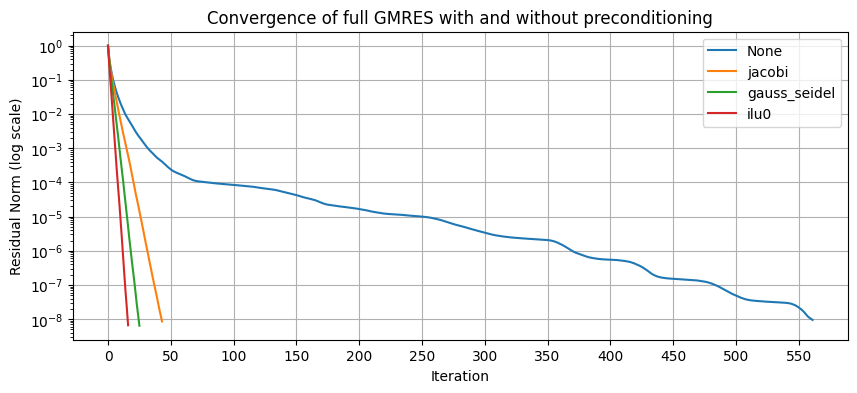

In [31]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 4))

for i, errors in enumerate(results):
    iterations = range(len(errors))
    plt.plot(iterations, np.abs(errors), label=f'{preconditioners[i]}')

plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Residual Norm (log scale)')
plt.title('Convergence of full GMRES with and without preconditioning')
plt.grid(True)
tick_width = 50
plt.xticks([tick_width*i for i in range(int(600/tick_width))])
plt.legend()
plt.savefig("conv_full_gmres.png", dpi=300)
plt.show()